## Feature Scaling: Estandarización Z-Score y escalado Min-Max 

- Acerca de la estandarización
- Sobre el escalado Min-Max y la estandarización
- ¿Estandarización o escalado Min-max?
- Estándarización o escalado Min-max, cómo podemos hacerlo en scikit-learn
- Acercamientos de abajo a arriba, Down-top
- El efecto de la estandarización en un PCA con un patrón de clasificación

<br>
<br>

### Acerca de la estandarización

El resultado de la **estandarización** (o **normalización de la puntuación Z**) es que las características se reescalarán para que tengan las propiedades de una distribución normal estándar con:

$\mu = 0$ and $\sigma = 1$

donde $\mu$ es la media (promedio) y $\sigma$ es la desviación estándar de la media; las puntuaciones estándar (también llamadas puntuaciones ***z***) de las muestras se calculan de la siguiente manera:

$$z = \frac{x - \mu}{\sigma}$$

La normalización de las características/features para que se centren en torno a 0 con una desviación estándar de 1 no sólo es importante si estamos comparando las mediciones que tienen diferentes unidades, pero también es un requisito general para muchos algoritmos de aprendizaje automático. Intuitivamente, podemos pensar en el descenso de gradiente como un ejemplo destacado (un algoritmo de optimización utilizado a menudo en regresión logística, SVMs, perceptrones, redes neuronales, etc.); con características en diferentes escalas, ciertos pesos pueden actualizarse más rápido que otros ya que los valores de las características $x_j$ juegan un papel en las actualizaciones de los pesos:

$$\Delta w_j = - \eta \frac{\partial J}{\partial w_j} = \eta \sum_i (t^{(i)} - o^{(i)})x^{(i)}_{j},$$

De modo que:

$$w_j := w_j + \Delta w_j,$$
donde $\eta$ es la tasa de aprendizaje, $t$ la etiqueta de la clase objetivo y $o$ la salida real.
Otros ejemplos intuitivos son los algoritmos K-Nearest Neighbor y los algoritmos de agrupación que utilizan, por ejemplo, medidas de distancia euclidiana; de hecho, los clasificadores basados en árboles son probablemente los únicos clasificadores en los que el escalado de características no supone ninguna diferencia.



Citando el [`scikit-learn`](http://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html) documentation:

*"Standardization of a dataset is a common requirement for many machine learning estimators: they might behave badly if the individual feature do not more or less look like standard normally distributed data (e.g. Gaussian with 0 mean and unit variance)."*

<br>
<br>

<a id='About-Min-Max-scaling-normalization'></a>

### Sobre el escalado Min-Max y la estandarización

Un enfoque alternativo a la normalización (o estandarización) de la puntuación Z es el llamado **escalado Mín-Máx** (a menudo también llamado simplemente "normalización", una causa común de ambigüedades).  
En este enfoque, los datos se escalan a un intervalo fijo, normalmente de 0 a 1. El coste de tener este intervalo limitado es que los datos se escalan a un intervalo fijo.  
El coste de tener este rango acotado -en contraste con la normalización- es que acabaremos con desviaciones estándar más pequeñas, lo que puede suprimir el efecto de los valores atípicos.

Un escalado Mín-Máx se realiza normalmente mediante la siguiente ecuación:

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

<br>
<br>

### ¿Estandarización o escalado Min-max?

"¿Estandarización o escalado Min-Max?" - No hay una respuesta obvia a esta pregunta: realmente depende de la aplicación. 

Por ejemplo, en los análisis de agrupamiento, la normalización puede ser especialmente crucial para comparar similitudes entre características basadas en determinadas medidas de distancia. Otro ejemplo destacado es el análisis de componentes principales, en el que solemos preferir la normalización al escalado Min-Max, ya que nos interesan los componentes que maximizan la varianza (dependiendo de la pregunta y de si el PCA calcula los componentes a través de la matriz de correlaciones en lugar de la matriz de covarianzas; [pero más sobre PCA en mi artículo anterior](http://sebastianraschka.com/Articles/2014_pca_step_by_step.html)).

Sin embargo, ¡esto no significa que el escalado Min-Max no sea útil en absoluto! Una aplicación popular es el procesamiento de imágenes, donde las intensidades de los píxeles tienen que normalizarse para ajustarse a un cierto rango (es decir, de 0 a 255 para la gama de colores RGB). Además, los algoritmos típicos de redes neuronales requieren datos en una escala de 0 a 1.

<br>
<br>

## Entandarización y escalado, cómo se hace en Numpy

Por supuesto, podríamos hacer uso de las capacidades de vectorización de NumPy para calcular las puntuaciones z para la normalización y para normalizar los datos utilizando las ecuaciones que se mencionaron en las secciones anteriores. Sin embargo, hay un enfoque aún más conveniente utilizando el módulo de preprocesamiento de una de las bibliotecas de aprendizaje automático de código abierto de Python [scikit-learn](http://scikit-learn.org ).

<br>
<br>

Para los siguientes ejemplos y debates, utilizaremos el conjunto de datos gratuito "Wine" depositado en el repositorio de aprendizaje automático de la UCI  
(http://archive.ics.uci.edu/ml/datasets/Wine)

<br>

<font size="1">
**Referencia:**  
Forina, M. et al, PARVUS - An Extendible Package for Data
Exploration, Classification and Correlation. Institute of Pharmaceutical
and Food Analysis and Technologies, Via Brigata Salerno, 
16147 Genoa, Italy.

Bache, K. & Lichman, M. (2013). UCI Machine Learning Repository [http://archive.ics.uci.edu/ml]. Irvine, CA: University of California, School of Information and Computer Science.

</font>

El conjunto de datos Wine consta de 3 clases diferentes, en las que cada fila corresponde a una muestra de vino concreta.

Las etiquetas de clase (1, 2, 3) figuran en la primera columna, y las columnas 2-14 corresponden a 13 atributos (características) diferentes:

1) Alcohol  
2) Ácido málico  
...

#### Cargando el dataset

In [1]:
import pandas as pd
import numpy as np

df = pd.io.parsers.read_csv(
    'https://raw.githubusercontent.com/rasbt/pattern_classification/master/data/wine_data.csv', 
     header=None,
     usecols=[0,1,2]
    )

df.columns=['Class label', 'Alcohol', 'Malic acid']

df.head()

,Class label,Alcohol,Malic acid
0,1,14.23,1.71
1,1,13.20,1.78
2,1,13.16,2.36
3,1,14.37,1.95
4,1,13.24,2.59


In [2]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 178 entries, 0 to 177
Data columns (total 3 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Class label  178 non-null    int64  
 1   Alcohol      178 non-null    float64
 2   Malic acid   178 non-null    float64
dtypes: float64(2), int64(1)
memory usage: 4.3 KB


In [3]:
df.describe()

,Class label,Alcohol,Malic acid
count,178.000000,178.000000,178.000000
mean,1.938202,13.000618,2.336348
std,0.775035,0.811827,1.117146
min,1.000000,11.030000,0.740000
25%,1.000000,12.362500,1.602500
50%,2.000000,13.050000,1.865000
75%,3.000000,13.677500,3.082500
max,3.000000,14.830000,5.800000


Como podemos ver en la tabla anterior, las características **Alcohol** (porcentaje/volumen) y **Ácido málico** (g/l) se miden en escalas diferentes, por lo que ***Escalado de características*** es necesario importante antes de cualquier comparación o combinación de estos datos.  



#### Estandardarización y Min-Max scaling

In [4]:
df[['Alcohol', 'Malic acid']].describe().loc[['mean', 'std']]

,Alcohol,Malic acid
mean,13.000618,2.336348
std,0.811827,1.117146


In [5]:
df[['Alcohol', 'Malic acid']].describe().loc[['min', 'max']]

,Alcohol,Malic acid
min,11.03,0.74
max,14.83,5.80


In [9]:
# !pip install scikit-learn

In [8]:
from sklearn import preprocessing

In [ ]:
std_scale = preprocessing.StandardScaler().fit(df[['Alcohol', 'Malic acid']])
df_std = std_scale.transform(df[['Alcohol', 'Malic acid']])


In [11]:
# Cuando vas a usar el procesador más veces
scaler = preprocessing.StandardScaler()
scaler.fit(df[['Alcohol', 'Malic acid']])
df_std = scaler.transform(df[['Alcohol', 'Malic acid']])

# Cuando vas a usar el procesador una sola vez
scaler = preprocessing.StandardScaler()
df_std = scaler.fit_transform(df[['Alcohol', 'Malic acid']])

# scaler.inverse_transform()

In [14]:
df[['Alcohol', 'Malic acid']].head()

,Alcohol,Malic acid
0,14.23,1.71
1,13.20,1.78
2,13.16,2.36
3,14.37,1.95
4,13.24,2.59


In [15]:
df_std[:5]


array([[ 1.51861254, -0.5622498 ],
       [ 0.24628963, -0.49941338],
       [ 0.19687903,  0.02123125],
       [ 1.69154964, -0.34681064],
       [ 0.29570023,  0.22769377]])

In [21]:
pd.DataFrame(df_std,columns=['alcohol','malic']).describe()

,alcohol,malic
count,1.780000e+02,1.780000e+02
mean,-8.382808e-16,-1.197544e-16
std,1.002821e+00,1.002821e+00
min,-2.434235e+00,-1.432983e+00
25%,-7.882448e-01,-6.587486e-01
50%,6.099988e-02,-4.231120e-01
75%,8.361286e-01,6.697929e-01
max,2.259772e+00,3.109192e+00


In [26]:
pd.DataFrame(df_std,columns=['alcohol','malic'])['alcohol'].std()

1.0028208800748637

In [27]:
minmax_scale = preprocessing.MinMaxScaler().fit(df[['Alcohol', 'Malic acid']])
df_minmax = minmax_scale.transform(df[['Alcohol', 'Malic acid']])

In [29]:
pd.DataFrame(df_minmax,columns=['alcohol','malic']).describe()

,alcohol,malic
count,178.000000,178.000000
mean,0.518584,0.315484
std,0.213639,0.220780
min,0.000000,0.000000
25%,0.350658,0.170455
50%,0.531579,0.222332
75%,0.696711,0.462945
max,1.000000,1.000000


In [33]:
print('Mean after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].mean(), df_std[:,1].mean()))

      
print('\nStandard deviation after standardization:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_std[:,0].std(), df_std[:,1].std()))

Mean after standardization:
Alcohol=-0.00, Malic acid=-0.00

Standard deviation after standardization:
Alcohol=1.00, Malic acid=1.00


In [34]:
print('Min-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].min(), df_minmax[:,1].min()))
print('\nMax-value after min-max scaling:\nAlcohol={:.2f}, Malic acid={:.2f}'
      .format(df_minmax[:,0].max(), df_minmax[:,1].max()))

Min-value after min-max scaling:
Alcohol=0.00, Malic acid=0.00

Max-value after min-max scaling:
Alcohol=1.00, Malic acid=1.00


#### Vamos a pintar!

In [35]:
%matplotlib inline

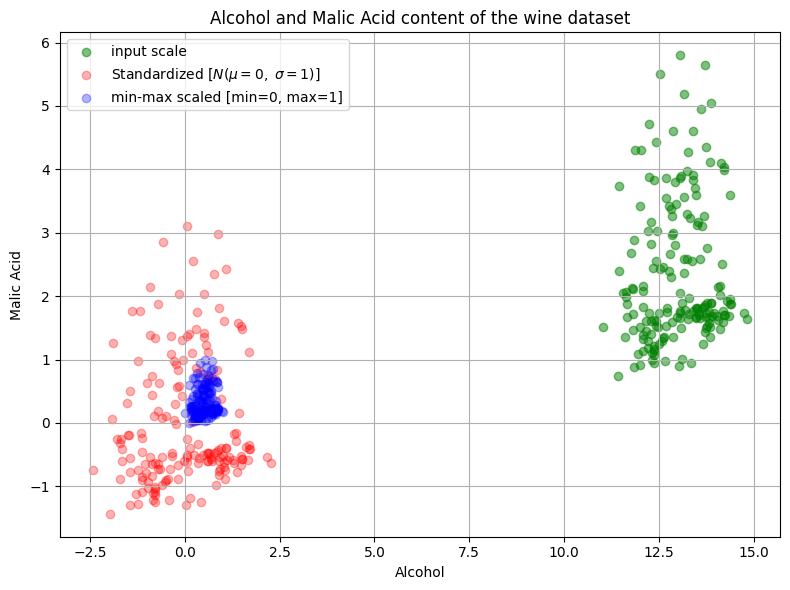

In [36]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))

    plt.scatter(df['Alcohol'], df['Malic acid'], 
            color='green', label='input scale', alpha=0.5)

    plt.scatter(df_std[:,0], df_std[:,1], color='red', 
            label='Standardized [$N  (\mu=0, \; \sigma=1)$]', alpha=0.3)

    plt.scatter(df_minmax[:,0], df_minmax[:,1], 
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()

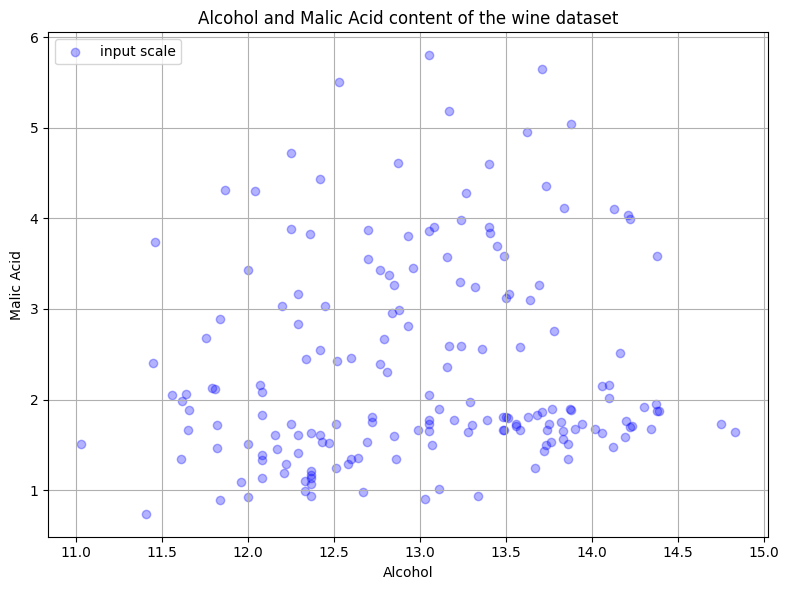

In [39]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))


    plt.scatter(df['Alcohol'], df['Malic acid'], 
            color='blue', label='input scale', alpha=0.3)


    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()

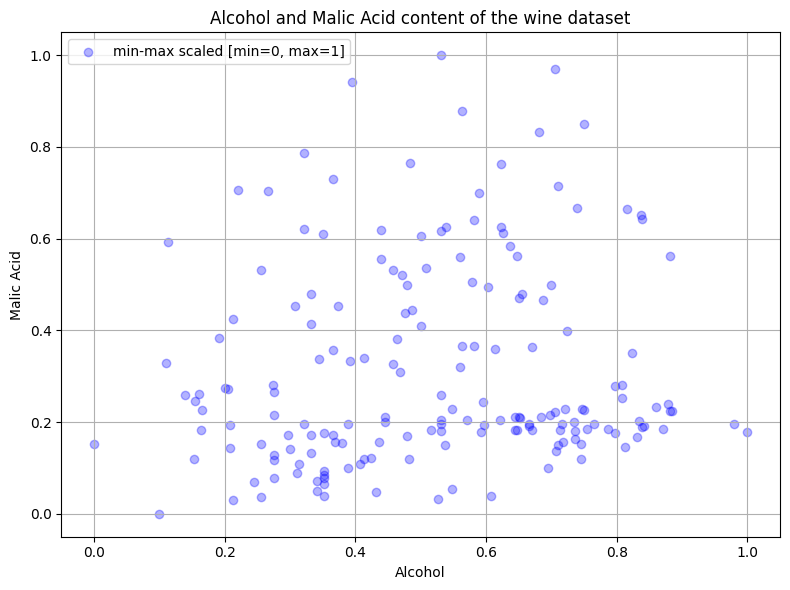

In [37]:
from matplotlib import pyplot as plt

def plot():
    plt.figure(figsize=(8,6))


    plt.scatter(df_minmax[:,0], df_minmax[:,1], 
            color='blue', label='min-max scaled [min=0, max=1]', alpha=0.3)

    plt.title('Alcohol and Malic Acid content of the wine dataset')
    plt.xlabel('Alcohol')
    plt.ylabel('Malic Acid')
    plt.legend(loc='upper left')
    plt.grid()
    
    plt.tight_layout()

plot()
plt.show()

<br>
<br>

El gráfico anterior incluye los puntos de datos del vino en las tres escalas diferentes: la escala de entrada en la que se midió el contenido de alcohol en volumen-porcentaje (verde), las características normalizadas (rojo) y las características normalizadas (azul).
En el siguiente gráfico, ampliaremos los tres ejes-escalas.

<br>
<br>

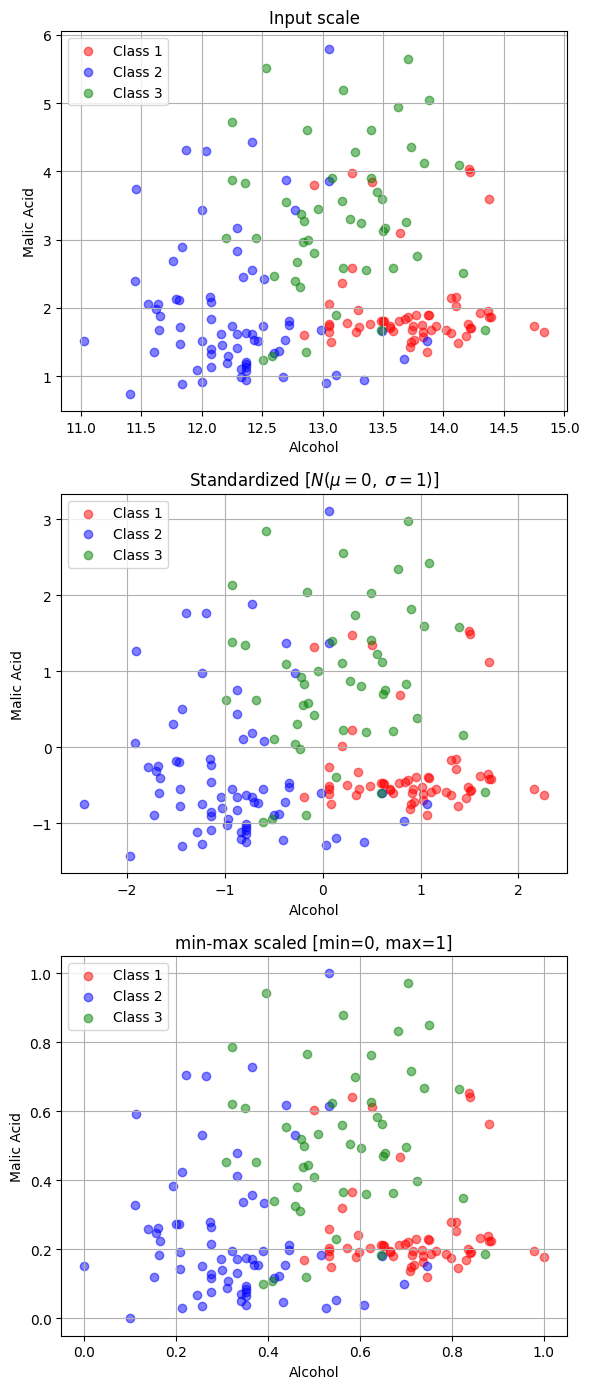

In [40]:
fig, ax = plt.subplots(3, figsize=(6,14))

for a,d,l in zip(range(len(ax)), 
               (df[['Alcohol', 'Malic acid']].values, df_std, df_minmax),
               ('Input scale', 
                'Standardized [$N  (\mu=0, \; \sigma=1)$]', 
                'min-max scaled [min=0, max=1]')
                ):
    for i,c in zip(range(1,4), ('red', 'blue', 'green')):
        ax[a].scatter(d[df['Class label'].values == i, 0], 
                  d[df['Class label'].values == i, 1],
                  alpha=0.5,
                  color=c,
                  label='Class %s' %i
                  )
    ax[a].set_title(l)
    ax[a].set_xlabel('Alcohol')
    ax[a].set_ylabel('Malic Acid')
    ax[a].legend(loc='upper left')
    ax[a].grid()
    
plt.tight_layout()

plt.show()

### Comparar características con diferentes escalas

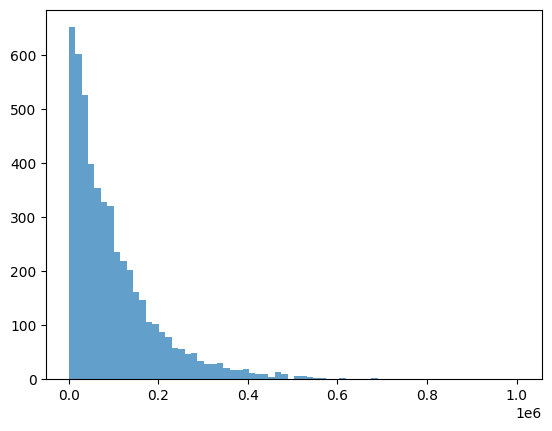

In [41]:
from scipy import stats
price_madrid = stats.gamma.rvs(1, size=5000)*100000

plt.hist(price_madrid, 70, histtype="stepfilled", alpha=.7);

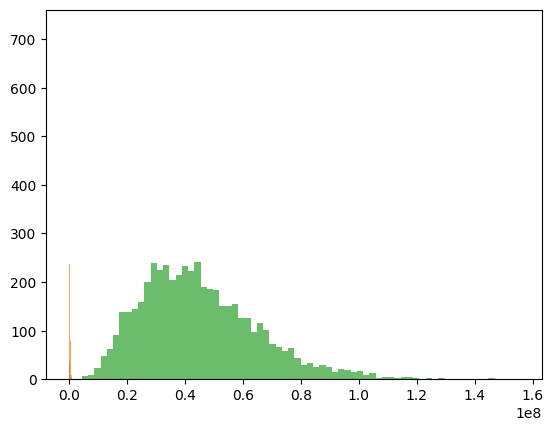

In [42]:
# Precios de casas en diferentes monedas
from scipy import stats
import matplotlib.pyplot as plt
price_madrid = stats.gamma.rvs(1, size=5000)*100000
price_london = stats.gamma(5).rvs(5000)*100000*0.87
price_spetesbourg = stats.gamma(5).rvs(5000)*100000*90.23

plt.hist(price_madrid, 70, alpha = .7)
plt.hist(price_london, 70, alpha = .7)
plt.hist(price_spetesbourg, 70, alpha = .7);

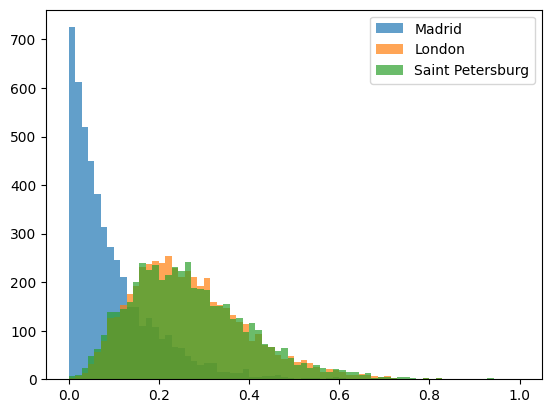

In [43]:
df = pd.DataFrame({'Madrid': price_madrid,
                  'London': price_london,
                  'Saint Petersburg': price_spetesbourg})

minmax_scale = preprocessing.MinMaxScaler().fit(df)
df_minmax = minmax_scale.transform(df)

plt.hist(df_minmax[:, 0], 70, histtype="stepfilled", alpha=.7, label='Madrid')
plt.hist(df_minmax[:, 1], 70, histtype="stepfilled", alpha=.7, label='London')
plt.hist(df_minmax[:, 2], 70, histtype="stepfilled", alpha=.7, label='Saint Petersburg')
plt.legend();

## Acercamientos de arriba a abajo

Por supuesto, también podemos codificar las ecuaciones para la estandarización y el escalado 0-1 Min-Max "manualmente". Sin embargo, los métodos de scikit-learn siguen siendo útiles si se trabaja con conjuntos de datos de prueba y de entrenamiento y se desea escalarlos por igual.

E.g., 
<pre>
std_scale = preprocessing.StandardScaler().fit(X_train)
X_train = std_scale.transform(X_train)
X_test = std_scale.transform(X_test)
</pre>

A continuación, realizaremos los cálculos utilizando código Python "puro", y una solución NumPy más conveniente, que es especialmente útil si intentamos transformar una matriz entera.

<br>
<br>

Sólo para recordar las ecuaciones que estamos utilizando:

Normalización:

\begin{equation} z = \frac{x - \mu}{\sigma}\end{equation} 


Con media:

\begin{equation}\mu = \frac{1}{N} \sum_{i=1}^N (x_i)\end{equation}

Con desviación estándar:

\begin{equation}\sigma = \sqrt{\frac{1}{N} \sum_{i=1}^N (x_i - \mu)^2}\end{equation}


Escalado Min-Max:

\begin{equation} X_{norm} = \frac{X - X_{min}}{X_{max}-X_{min}} \end{equation}

### Vamos con python:

In [44]:
# Standardization

x = [1,4,5,6,6,2,3]
mean = sum(x)/len(x)
std_dev = (1/len(x) * sum([ (x_i - mean)**2 for x_i in x]))**0.5

z_scores = [(x_i - mean)/std_dev for x_i in x]

# Min-Max scaling

minmax = [(x_i - min(x)) / (max(x) - min(x)) for x_i in x]

In [ ]:
minmax = []
for x_i in x:
    minmax.append((x_i - min(x)) / (max(x) - min(x)))

In [49]:
preprocessing.MinMaxScaler().fit_transform(np.array(x).reshape(-1,1)).reshape(-1)

array([0. , 0.6, 0.8, 1. , 1. , 0.2, 0.4])

In [45]:
minmax

[0.0, 0.6, 0.8, 1.0, 1.0, 0.2, 0.4]

<br>
<br>

### NumPy

In [50]:
import numpy as np

# Standardization

x_np = np.asarray(x)
z_scores_np = (x_np - x_np.mean()) / x_np.std()

# Min-Max scaling

np_minmax = (x_np - x_np.min()) / (x_np.max() - x_np.min())

<br>
<br>

### Visualización:

Sólo para asegurarnos de que nuestro código funciona correctamente, vamos a trazar los resultados a través de matplotlib.

In [51]:
%matplotlib inline

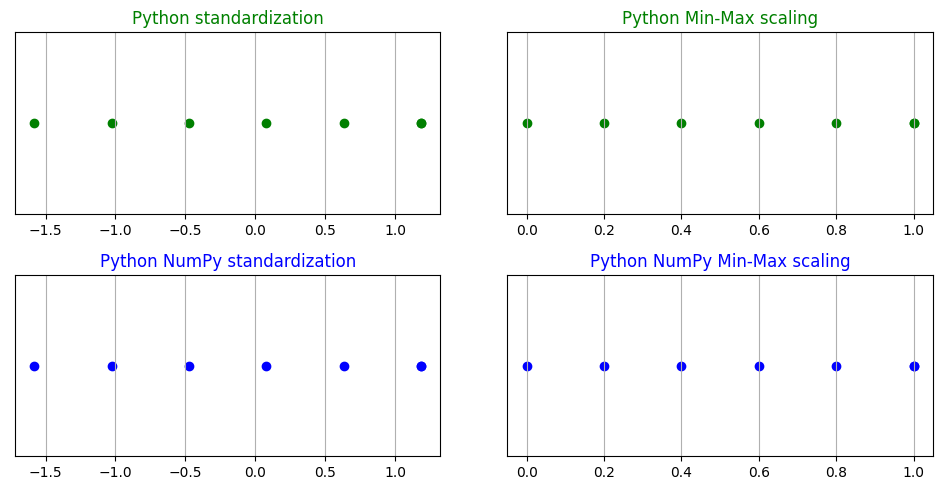

In [52]:
from matplotlib import pyplot as plt

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(nrows=2, ncols=2, figsize=(10,5))

y_pos = [0 for i in range(len(x))]

ax1.scatter(z_scores, y_pos, color='g')
ax1.set_title('Python standardization', color='g')

ax2.scatter(minmax, y_pos, color='g')
ax2.set_title('Python Min-Max scaling', color='g')

ax3.scatter(z_scores_np, y_pos, color='b')
ax3.set_title('Python NumPy standardization', color='b')

ax4.scatter(np_minmax, y_pos, color='b')
ax4.set_title('Python NumPy Min-Max scaling', color='b')
    
plt.tight_layout()

for ax in (ax1, ax2, ax3, ax4):
    ax.get_yaxis().set_visible(False)
    ax.grid()

plt.show()

<br>
<br>

# Binning

In [53]:
import pandas as pd

fcc_survey_df = pd.read_csv('fcc_2016_coder_survey_subset.csv', encoding='utf-8')
fcc_survey_df[['ID.x', 'EmploymentField', 'Age', 'Income']].head()

,ID.x,EmploymentField,Age,Income
0,cef35615d61b202f1dc794ef2746df14,office and administrative support,28.0,32000.0
1,323e5a113644d18185c743c241407754,food and beverage,22.0,15000.0
2,b29a1027e5cd062e654a63764157461d,finance,19.0,48000.0
3,04a11e4bcb573a1261eb0d9948d32637,"arts, entertainment, sports, or media",26.0,43000.0
4,9368291c93d5d5f5c8cdb1a575e18bec,education,20.0,6000.0


In [54]:
fcc_survey_df.shape

(15620, 15)

## Binning con cortes fijos

### Distribución de la edad de los desarrolladores:

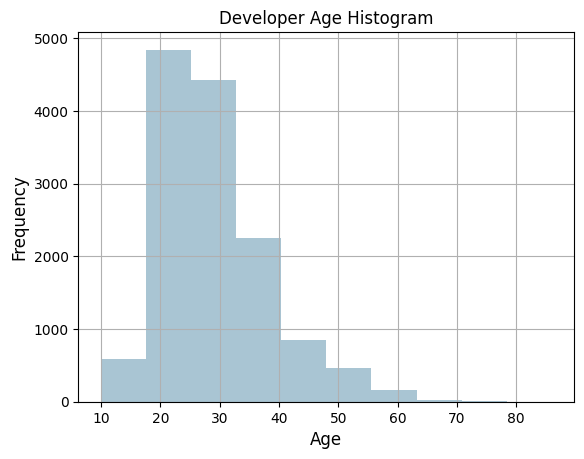

In [55]:
fig, ax = plt.subplots()
fcc_survey_df['Age'].hist(color='#A9C5D3')
ax.set_title('Developer Age Histogram', fontsize=12)
ax.set_xlabel('Age', fontsize=12)
ax.set_ylabel('Frequency', fontsize=12);

### Binning basado en redondeo:

``` 
Age Range: Bin
---------------
 0 -  9  : 0
10 - 19  : 1
20 - 29  : 2
30 - 39  : 3
40 - 49  : 4
50 - 59  : 5
60 - 69  : 6
  ... and so on
```

In [56]:
fcc_survey_df['Age_bin_round'] = np.array(np.floor(np.array(fcc_survey_df['Age']) / 10.))
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round']].iloc[1071:1076]

,ID.x,Age,Age_bin_round
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0


### Binning basado en rangos personalizados:

``` 
Age Range : Bin
---------------
 0 -  15  : 1
16 -  30  : 2
31 -  45  : 3
46 -  60  : 4
61 -  75  : 5
75 - 100  : 6
```

In [57]:
fcc_survey_df['Age'].unique()

array([28., 22., 19., 26., 20., 34., 23., 35., 33., 57., 47., nan, 37.,
       31., 27., 29., 30., 32., 25., 44., 21., 24., 18., 39., 41., 43.,
       36., 40., 38., 16., 46., 15., 14., 50., 49., 45., 55., 51., 17.,
       53., 52., 48., 56., 42., 54., 58., 65., 59., 75., 61., 80., 62.,
       60., 66., 12., 11., 13., 63., 64., 70., 73., 69., 71., 68., 86.,
       10., 67., 72.])

In [58]:
bin_ranges = [0, 15, 30, 45, 60, 75, 100]
bin_names = [1, 2, 3, 4, 5, 6]

fcc_survey_df['Age_bin_custom_range'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges)
fcc_survey_df['Age_bin_custom_label'] = pd.cut(np.array(fcc_survey_df['Age']), 
                                               bins=bin_ranges, labels=bin_names)
fcc_survey_df[['ID.x', 'Age', 'Age_bin_round', 
               'Age_bin_custom_range', 'Age_bin_custom_label']].iloc[1071:1076]

,ID.x,Age,Age_bin_round,Age_bin_custom_range,Age_bin_custom_label
1071,6a02aa4618c99fdb3e24de522a099431,17.0,1.0,"(15, 30]",2
1072,f0e5e47278c5f248fe861c5f7214c07a,38.0,3.0,"(30, 45]",3
1073,6e14f6d0779b7e424fa3fdd9e4bd3bf9,21.0,2.0,"(15, 30]",2
1074,c2654c07dc929cdf3dad4d1aec4ffbb3,53.0,5.0,"(45, 60]",4
1075,f07449fc9339b2e57703ec7886232523,35.0,3.0,"(30, 45]",3


In [63]:
def bin_ages(x):
    if x >= 0 and x <=15:
        return 1
    elif x>15 and x<=32:
        return 'Pedro'
    else:
        return x*x

fcc_survey_df['Age_bin_custom_label'] = fcc_survey_df['Age'].apply(bin_ages)

In [65]:
aux = []

for i in fcc_survey_df['Age']:
    aux.append(bin_ages(i))

In [61]:
fcc_survey_df['Age_bin_custom_label']

0       NaN
1       NaN
2       NaN
3       NaN
4       NaN
         ..
15615   NaN
15616   NaN
15617   NaN
15618   NaN
15619   NaN
Name: Age_bin_custom_label, Length: 15620, dtype: float64

In [62]:
fcc_survey_df['Age'] * 2

0        56.0
1        44.0
2        38.0
3        52.0
4        40.0
         ... 
15615    78.0
15616    54.0
15617    74.0
15618    52.0
15619    44.0
Name: Age, Length: 15620, dtype: float64

In [ ]:
for edad in fcc_survey_df['Age']:
    return edad * 2